In [61]:
import pandas as pd
import numpy as np

# 난수 생성 시드 설정
np.random.seed(42)

# 데이터 생성
data = {
    'ID': range(1, 201),  # 1부터 200까지의 직원 ID
    'Age': np.random.randint(18, 70, 200),  # 18세에서 70세 사이의 나이
    'Salary' : [np.random.choice([np.random.randint(30000, 120000),
                             np.random.randint(30000, 120000),
                             np.random.randint(30000, 120000),
                             np.random.randint(300000, 500000)]) for _ in range(200)],
 # 30,000에서 120,000 사이의 연봉
    'Department': np.random.choice(['HR', 'Engineering', 'Marketing', 'Sales'], 200),  # 부서명
    'JoinDate': pd.to_datetime(np.random.choice(pd.date_range('2010-01-01', '2024-01-01', freq='D'), 200))  # 입사일
    
}

# DataFrame 생성
df = pd.DataFrame(data)

df.loc[0:9, 'Age'] = np.nan
df.loc[20:29, 'Salary'] = np.nan
df.loc[40:49, 'JoinDate'] = np.nan
df.loc[60:69, 'Department'] = np.nan



# CSV 파일로 저장
df.to_csv('employee_data.csv', index=False)


In [62]:
# 데이터 불러오기
df = pd.read_csv('employee_data.csv')

# 결측치 확인
print(df.isnull().sum())

# 결측치가 있는 행 삭제
df_no_missing = df.dropna()


ID             0
Age           10
Salary        10
Department    10
JoinDate      10
dtype: int64


In [63]:
# 'Salary' 결측치를 평균값으로 대체
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())


# 'Salary'를 정수형으로 변환
df['Salary'] = df['Salary'].astype(int)

# 데이터 확인
print(df.head())




   ID  Age  Salary Department    JoinDate
0   1  NaN   88053  Marketing  2023-09-15
1   2  NaN   96199      Sales  2012-04-02
2   3  NaN   91087      Sales  2012-08-01
3   4  NaN  113211      Sales  2022-02-12
4   5  NaN   97172      Sales  2012-02-14


In [67]:
# 이상치 제거 (IQR 방식)
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

# IQR 범위 벗어난 값 제거
df_no_outliers = df[(df['Salary'] >= (Q1 - 1.5 * IQR)) & (df['Salary'] <= (Q3 + 1.5 * IQR))]
len(df_no_outliers)



158

In [70]:
# 'JoinDate'를 datetime 형식으로 변환
df['JoinDate'] = pd.to_datetime(df['JoinDate'])
df


,ID,Age,Salary,Department,JoinDate
0,1,NaN,88053,Marketing,2023-09-15
1,2,NaN,96199,Sales,2012-04-02
2,3,NaN,91087,Sales,2012-08-01
3,4,NaN,113211,Sales,2022-02-12
4,5,NaN,97172,Sales,2012-02-14
...,...,...,...,...,...
195,196,69.0,470738,Sales,2016-09-27
196,197,30.0,107834,Sales,2021-11-25
197,198,58.0,85318,HR,2023-04-17
198,199,20.0,105993,Engineering,2014-12-10


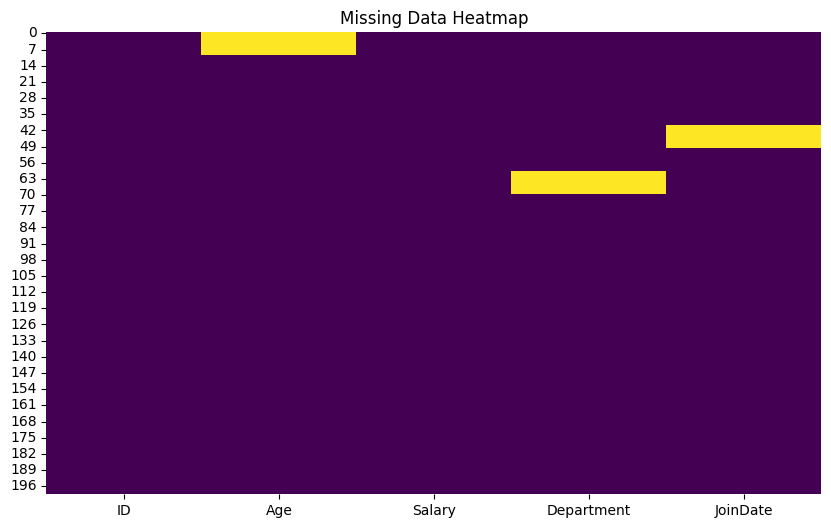

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# 결측치 히트맵 확인
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


In [72]:
# 중복된 데이터 확인
print(df[df.duplicated()])

# 중복 행 삭제 (첫 번째 값만 유지)
df_no_duplicates = df.drop_duplicates(keep='first')


Empty DataFrame
Columns: [ID, Age, Salary, Department, JoinDate]
Index: []


In [75]:
# 연봉이 50,000 이상인 직원 필터링
df_filtered = df[df['Salary'] >= 50000]
df_filtered


,ID,Age,Salary,JoinDate,Department
0,1,NaN,88053.0,2020-07-14,Sales
1,2,NaN,51959.0,2022-04-23,HR
5,6,NaN,96199.0,2023-07-01,HR
6,7,NaN,64766.0,2017-08-06,Marketing
7,8,NaN,103530.0,2015-06-06,Marketing
...,...,...,...,...,...
192,193,50.0,59592.0,2013-04-06,Engineering
195,196,69.0,118891.0,2013-05-02,HR
196,197,30.0,117545.0,2014-03-21,Marketing
197,198,58.0,119912.0,2018-11-11,HR


In [78]:
# 30대 이상이고 연봉이 60,000 이상인 직원
df_filtered_complex = df[(df['Age'] >= 30) & (df['Salary'] >= 60000)]
df_filtered_complex.reset_index()


,index,ID,Age,Salary,JoinDate,Department
0,12,13,41.0,76576.0,2011-07-29,Engineering
1,13,14,53.0,69353.0,2018-12-06,Sales
2,14,15,57.0,92003.0,2013-02-22,Marketing
3,15,16,41.0,113211.0,2014-09-12,Marketing
4,17,18,39.0,95318.0,2023-07-05,Sales
...,...,...,...,...,...,...
78,190,191,42.0,79689.0,2019-01-15,HR
79,191,192,56.0,80993.0,2014-03-23,HR
80,195,196,69.0,118891.0,2013-05-02,HR
81,196,197,30.0,117545.0,2014-03-21,Marketing


In [89]:
# 'Age'와 'Salary'만 선택
df_subset = df[['Age', 'Salary']]
print(df_subset)

# 'Age'에서 NaN 값만 삭제하고 인덱스를 리셋
df_subset = df_subset.dropna(subset=['Age','Salary']).reset_index(drop=True)
print(df_subset)


      Age    Salary
0     NaN   88053.0
1     NaN   51959.0
2     NaN   35530.0
3     NaN   33748.0
4     NaN   43545.0
..    ...       ...
195  69.0  118891.0
196  30.0  117545.0
197  58.0  119912.0
198  20.0  100316.0
199  56.0   32368.0

[200 rows x 2 columns]
      Age    Salary
0    28.0   84384.0
1    28.0   81005.0
2    41.0   76576.0
3    53.0   69353.0
4    57.0   92003.0
..    ...       ...
175  69.0  118891.0
176  30.0  117545.0
177  58.0  119912.0
178  20.0  100316.0
179  56.0   32368.0

[180 rows x 2 columns]


In [92]:
# 부서별 평균 Salary와 Age 계산
df_grouped = df.groupby('Department').agg({'Salary': 'mean', 'Age': 'mean'}).reset_index()

# 각 열을 정수형으로 변환
df_grouped['Salary'] = df_grouped['Salary'].astype(int)
df_grouped['Age'] = df_grouped['Age'].astype(int)

print(df_grouped)


    Department  Salary  Age
0  Engineering   70414   40
1           HR   72024   47
2    Marketing   79575   42
3        Sales   70625   41


In [96]:
# 부서별, 나이대별 평균 Salary 계산 (피벗)
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 29, 39, 49, 59, 70], labels=['20s', '30s', '40s', '50s', '60s'])
df_pivot = df.pivot_table(values='Salary', index='Department', columns='AgeGroup', aggfunc='mean').astype(int).applymap(lambda x: f'{x:,}')
print(df_pivot)


AgeGroup        20s     30s     40s     50s     60s
Department                                         
Engineering  82,927  59,613  71,284  69,917  58,671
HR           89,443  66,738  68,593  67,109  73,126
Marketing    85,842  80,572  78,859  73,751  80,009
Sales        81,441  84,100  56,644  53,907  71,914


/var/folders/h8/dk4pn1l11_5f5z7pscs8gr0r0000gn/T/ipykernel_9121/1525734231.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot = df.pivot_table(values='Salary', index='Department', columns='AgeGroup', aggfunc='mean').astype(int).applymap(lambda x: f'{x:,}')
/var/folders/h8/dk4pn1l11_5f5z7pscs8gr0r0000gn/T/ipykernel_9121/1525734231.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_pivot = df.pivot_table(values='Salary', index='Department', columns='AgeGroup', aggfunc='mean').astype(int).applymap(lambda x: f'{x:,}')


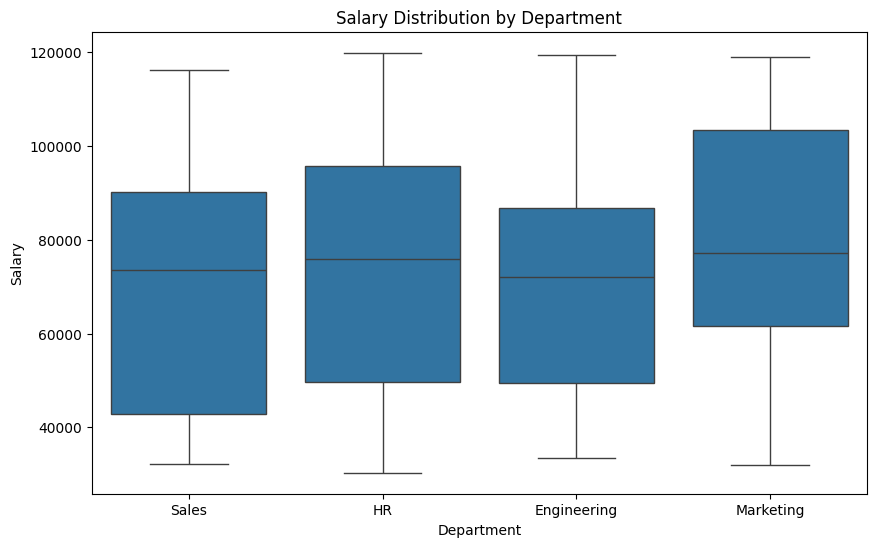

In [97]:
# 부서별 연봉 분포
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department', y='Salary', data=df)
plt.title('Salary Distribution by Department')
plt.show()


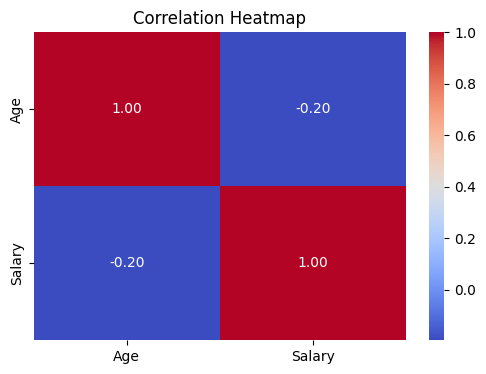

In [101]:
# 상관관계 히트맵
corr = df[['Age', 'Salary']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [102]:
from fpdf import FPDF

# PDF 객체 생성
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()

# 제목
pdf.set_font("Arial", size=16, style='B')
pdf.cell(200, 10, txt="Employee Data Analysis Report", ln=True, align='C')

# 데이터 그룹화 결과
pdf.ln(10)
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, txt="Department-wise Salary and Age Analysis", ln=True)
pdf.ln(5)

# 테이블 추가
pdf.set_font("Arial", size=10)
pdf.cell(40, 10, "Department", border=1)
pdf.cell(40, 10, "Average Salary", border=1)
pdf.cell(40, 10, "Average Age", border=1)
pdf.ln()

for _, row in df_grouped.iterrows():
    pdf.cell(40, 10, row['Department'], border=1)
    pdf.cell(40, 10, str(row['Salary']), border=1)
    pdf.cell(40, 10, str(row['Age']), border=1)
    pdf.ln()

# PDF 저장
pdf.output("employee_report.pdf")


ModuleNotFoundError: No module named 'fpdf'

In [103]:
!pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40705 sha256=a4f02e9ec3d7c356ad51900628f64e6523b4fd5a5af4c5e7dfc6ccb16f78e4cc
  Stored in directory: /Users/kimjongphil/Library/Caches/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


------------------------------------------------------------------------------------------------------------------------------------------------------------

In [73]:
import pandas as pd
import numpy as np

# 임의의 데이터 생성
np.random.seed(42)

# 200개의 샘플을 생성
data = {
    'ID': range(1, 201),
    'Age': np.random.randint(18, 70, 200),
    'Salary': np.random.randint(30000, 120000, 200),
    'JoinDate': pd.to_datetime(np.random.choice(pd.date_range('2010-01-01', '2024-01-01', freq='D'), 200)),
    'Department': np.random.choice(['HR', 'Engineering', 'Marketing', 'Sales'], 200)
}

df = pd.DataFrame(data)

# 일부러 결측치 추가 (각각 10개씩)
df.loc[0:9, 'Age'] = np.nan
df.loc[20:29, 'Salary'] = np.nan
df.loc[40:49, 'JoinDate'] = np.nan
df.loc[60:69, 'Department'] = np.nan

# CSV 파일로 저장
df.to_csv('./data/employee_data_with_missing.csv', index=False)


In [2]:
# CSV 파일 불러오기
df = pd.read_csv('./data/employee_data_with_missing.csv')

# 결측치 확인
print("결측치 개수 확인:")
print(df.isnull().sum())


결측치 개수 확인:
ID             0
Age           10
Salary        10
JoinDate      10
Department    10
dtype: int64


In [17]:
df_filled = df.copy()
df_filled['Age'].fillna(df_filled['Age'].mean()).astype(int)

0      43
1      43
2      43
3      43
4      43
       ..
195    69
196    30
197    58
198    20
199    56
Name: Age, Length: 200, dtype: int64

In [18]:
# 결측치가 있는 행 제거
df_no_missing = df.dropna()

# 결측치를 각 컬럼의 평균값으로 대체
df_filled = df.copy()
df_filled['Age'] = df_filled['Age'].fillna(df_filled['Age'].mean()).astype(int)
df_filled['Salary'] = df_filled['Salary'].fillna(df_filled['Salary'].mean()).astype(int)
df_filled['JoinDate'] = df_filled['JoinDate'].fillna(df_filled['JoinDate'].mode()[0])
df_filled['Department'] = df_filled['Department'].fillna(df_filled['Department'].mode()[0])

print("결측치가 제거된 데이터:")
print(df_no_missing)
print() 

print("결측치가 대체된 데이터:")
print(df_filled)


결측치가 제거된 데이터:
      ID   Age    Salary    JoinDate   Department
10    11  28.0   84384.0  2020-03-25        Sales
11    12  28.0   81005.0  2020-04-27        Sales
12    13  41.0   76576.0  2011-07-29  Engineering
13    14  53.0   69353.0  2018-12-06        Sales
14    15  57.0   92003.0  2013-02-22    Marketing
..   ...   ...       ...         ...          ...
195  196  69.0  118891.0  2013-05-02           HR
196  197  30.0  117545.0  2014-03-21    Marketing
197  198  58.0  119912.0  2018-11-11           HR
198  199  20.0  100316.0  2016-07-14           HR
199  200  56.0   32368.0  2020-03-08        Sales

[160 rows x 5 columns]

결측치가 대체된 데이터:
      ID  Age  Salary    JoinDate   Department
0      1   43   88053  2020-07-14        Sales
1      2   43   51959  2022-04-23           HR
2      3   43   35530  2017-05-25           HR
3      4   43   33748  2012-08-29  Engineering
4      5   43   43545  2013-03-12        Sales
..   ...  ...     ...         ...          ...
195  196   69  118

In [19]:
# 중복된 행 확인
print("중복된 데이터 확인:")
print(df_filled[df_filled.duplicated()])

# 중복된 행 제거 (first, last 선택 가능)
df_no_duplicates = df_filled.drop_duplicates(keep='first')
print("중복 제거된 데이터:")
print(df_no_duplicates)


중복된 데이터 확인:
Empty DataFrame
Columns: [ID, Age, Salary, JoinDate, Department]
Index: []
중복 제거된 데이터:
      ID  Age  Salary    JoinDate   Department
0      1   43   88053  2020-07-14        Sales
1      2   43   51959  2022-04-23           HR
2      3   43   35530  2017-05-25           HR
3      4   43   33748  2012-08-29  Engineering
4      5   43   43545  2013-03-12        Sales
..   ...  ...     ...         ...          ...
195  196   69  118891  2013-05-02           HR
196  197   30  117545  2014-03-21    Marketing
197  198   58  119912  2018-11-11           HR
198  199   20  100316  2016-07-14           HR
199  200   56   32368  2020-03-08        Sales

[200 rows x 5 columns]


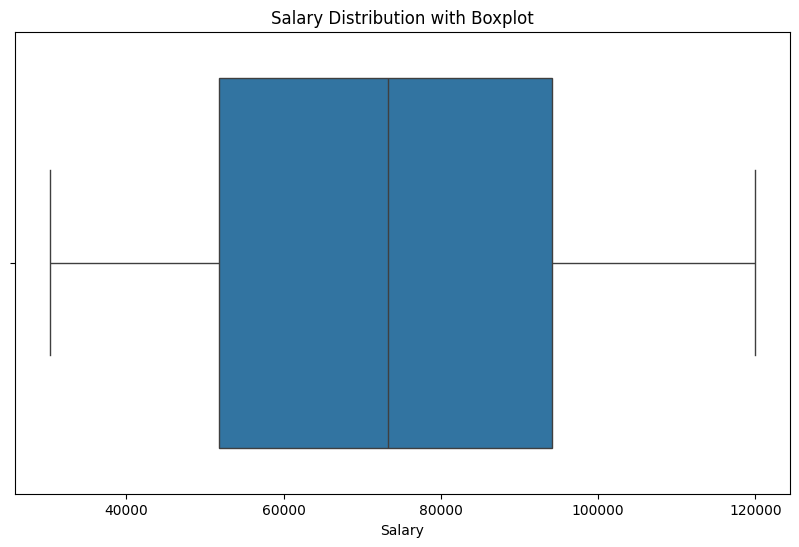

Salary의 이상치 범위: -11750.625 ~ 157658.375
이 범위를 벗어난 Salary 값: Empty DataFrame
Columns: [ID, Age, Salary, JoinDate, Department]
Index: []


In [22]:
# 이상치를 시각적으로 확인하기 위한 Boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filled['Salary'])
plt.title('Salary Distribution with Boxplot')
plt.show()

# Salary 이상치 범위 확인 (IQR 방식)
Q1 = df_filled['Salary'].quantile(0.25)
Q3 = df_filled['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Salary의 이상치 범위: {lower_bound} ~ {upper_bound}")
print(f"이 범위를 벗어난 Salary 값: {df_filled[(df_filled['Salary'] < lower_bound) | (df_filled['Salary'] > upper_bound)]}")


In [23]:
# 이상치 제거
df_no_outliers = df_filled[(df_filled['Salary'] >= lower_bound) & (df_filled['Salary'] <= upper_bound)]
print("이상치가 제거된 데이터:")
print(df_no_outliers.head())


이상치가 제거된 데이터:
   ID  Age  Salary    JoinDate   Department
0   1   43   88053  2020-07-14        Sales
1   2   43   51959  2022-04-23           HR
2   3   43   35530  2017-05-25           HR
3   4   43   33748  2012-08-29  Engineering
4   5   43   43545  2013-03-12        Sales


In [27]:
# 데이터 유형 확인
print("데이터 유형 확인:")
print(df.dtypes)

# Salary를 정수형으로 변환
# 결측치를 평균값으로 채운 후 Salary 열을 정수형으로 변환
df['Salary'] = df['Salary'].fillna(df['Salary'].mean()).astype(int)

# JoinDate가 datetime 형식으로 되어있는지 확인 후 변환
df['JoinDate'] = pd.to_datetime(df['JoinDate'], errors='coerce')

print("데이터 유형이 정규화된 데이터:")
print(df.dtypes)


데이터 유형 확인:
ID                     int64
Age                  float64
Salary               float64
JoinDate      datetime64[ns]
Department            object
dtype: object
데이터 유형이 정규화된 데이터:
ID                     int64
Age                  float64
Salary                 int64
JoinDate      datetime64[ns]
Department            object
dtype: object
